In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
import matplotlib.ticker as ticker
from matplotlib import rc
from scipy.stats import norm
from scipy.special import factorial
from scipy.special import gammaln
from tqdm import tqdm

In [16]:
# Matplotlib customize
plt.rcParams['figure.figsize'] = [6,5]
plt.rcParams['figure.dpi'] = 100

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 4

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.markerscale'] = 1.5
plt.rcParams['legend.borderpad'] = 0.6
plt.rcParams['legend.framealpha'] = 0.7

In [17]:
# Reading channels
data = pd.read_csv('datos.csv',sep=',')
n = np.array(data.n)
b = np.array(data.b)
s = np.array(data.s)
N = n.shape[0]
data

,n,b,s
0,1005,1000,10


In [18]:
def Likelihood(n,b,s,mu):
    
    lambda_ = mu*s + b
    
    return np.exp(-lambda_)*lambda_**n #/ factorial(n)

In [12]:
Likelihood(1000,1000,100,0.5)

OverflowError: (34, 'Numerical result out of range')

In [5]:
def GetJointLogLikelihood(Like,mu,Expected=True):
    
    Joint = 0.
    
    for c in range(N):
        
        if Expected:
            Joint += np.log(Likelihood(b[c],b[c],s[c],mu))
        else:
            Joint += np.log(Likelihood(n[c],b[c],s[c],mu))
            
    return -2*Joint

In [10]:
mu = np.linspace(1.,0.5,20)
LogLike = GetJointLogLikelihood(Likelihood,mu,Expected=False)

/tmp/ipykernel_18719/1455969073.py:5: RuntimeWarning: overflow encountered in power
  return np.exp(-lambda_)*lambda_**n #/ factorial(n)
/tmp/ipykernel_18719/1455969073.py:5: RuntimeWarning: invalid value encountered in multiply
  return np.exp(-lambda_)*lambda_**n #/ factorial(n)


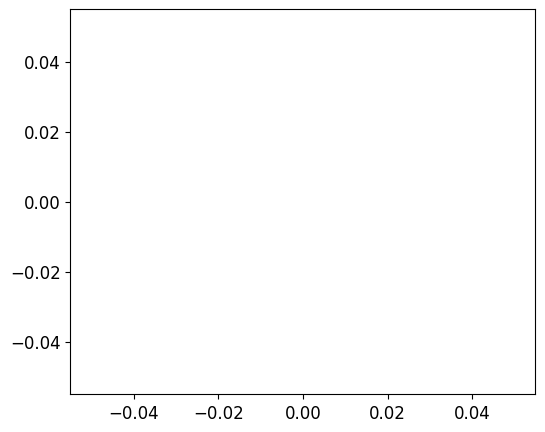

In [11]:
plt.plot(mu,LogLike)